#530 I-7 Project 1
Most coding cells utilizes gemini explanation and restructure along with use of example codes from class colabs and previous assignments



#Part 1 Topic and Dataset

https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024

The dataset contains a diverse group of participants representing a range of ages, countries, and
professions. This dataset focuses on the relationship between happiness and mental health
through understanding participants’ everyday lifestyle factors. The qualitative data captures
aspects such as diet, exercise level, stress, and diagnosed mental health conditions. The
quantitative data measures variables like social interaction, work hours, and screen time.

1. Determine whether healthy lifestyle habits are associated with a decrease in mental health
disorders.
2. Examine how different lifestyle choices positively or negatively influence preexisting
mental health conditions.



In [27]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting graphs

In [29]:
mental_health_lifestyle_data = pd.read_csv('/content/drive/MyDrive/Datasets/Mental_Health_Lifestyle_Dataset.csv')
mental_health_lifestyle_data.head() # Displaying the first 5 rows of the dataset to understand its structure

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


#Part 2 Clean, Orangize, and Explore

2.1 Data is clean and has no areas to remove, rename, or omissions to manage.

2.2

In [30]:
continuous_cols = ['Sleep Hours', 'Work Hours per Week',
                   'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']

# quick summary (mean, std, min, max)
mental_health_lifestyle_data[continuous_cols].describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Sleep Hours,6.475933,1.499866,1.4,5.5,6.5,7.5,11.3
Work Hours per Week,39.466333,11.451459,20.0,30.0,39.0,50.0,59.0
Screen Time per Day (Hours),5.089833,1.747231,2.0,3.6,5.1,6.6,8.0
Social Interaction Score,5.470200,2.563532,1.0,3.3,5.5,7.6,10.0
Happiness Score,5.395067,2.557601,1.0,3.2,5.4,7.5,10.0


In [31]:
bins_age = [15, 25, 35, 45, 55, 65]
labels_age = ['16–25', '26–35', '36–45', '46–55', '56–65']
mental_health_lifestyle_data['Age Group'] = pd.cut(mental_health_lifestyle_data['Age'], bins=bins_age, labels=labels_age, right=False)
df = mental_health_lifestyle_data.copy()

bins_work = range(int(df['Work Hours per Week'].min()), int(mental_health_lifestyle_data['Work Hours per Week'].max()) + 11, 10)
labels_work = [f'{i}-{i+9}' for i in bins_work[:-1]]
df['Work Hours Group'] = pd.cut(df['Work Hours per Week'], bins=bins_work, labels=labels_work, right=False, include_lowest=True)


# Frequency table for discrete / grouped quantitative data
quant_cols = ['Age Group', 'Work Hours Group']

for col in quant_cols:
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequency']
    freq_table = freq_table.sort_values(by=col) # Sort by the column containing the values
    freq_table['Prevalence (%)'] = (freq_table['Frequency'] / len(df) * 100).round(2)
    print(f"\n--- {col} ---")
    display(freq_table)


--- Age Group ---


,Age Group,Frequency,Prevalence (%)
4,16–25,408,13.60
3,26–35,635,21.17
0,36–45,673,22.43
2,46–55,639,21.30
1,56–65,645,21.50



--- Work Hours Group ---


,Work Hours Group,Frequency,Prevalence (%)
3,20-29,727,24.23
0,30-39,786,26.20
2,40-49,735,24.50
1,50-59,752,25.07


In [32]:
stress_table = df['Stress Level'].value_counts().reset_index()
stress_table.columns = ['Stress Level', 'Frequency']
stress_table['Prevalence (%)'] = (stress_table['Frequency'] / len(df) * 100).round(2)
display(stress_table)

,Stress Level,Frequency,Prevalence (%)
0,Low,1008,33.6
1,High,1002,33.4
2,Moderate,990,33.0


In [33]:
Mental_health_table = df['Mental Health Condition'].value_counts().reset_index()
Mental_health_table.columns = ['Mental Health Condition', 'Frequency']
Mental_health_table['Prevalence (%)'] = (stress_table['Frequency'] / len(df) * 100).round(2)
display(Mental_health_table)

,Mental Health Condition,Frequency,Prevalence (%)
0,Anxiety,628,33.6
1,PTSD,624,33.4
2,Depression,580,33.0
3,Bipolar,573,NaN


In [34]:
diet_table = df['Diet Type'].value_counts().reset_index()
diet_table.columns = ['Diet Type', 'Frequency']
diet_table['Prevalence (%)'] = (diet_table['Frequency'] / len(df) * 100).round(2)
display(diet_table)

,Diet Type,Frequency,Prevalence (%)
0,Junk Food,637,21.23
1,Balanced,625,20.83
2,Vegetarian,592,19.73
3,Vegan,573,19.10
4,Keto,573,19.10


In [35]:
exercise_table = df['Exercise Level'].value_counts().reset_index()
exercise_table.columns = ['Exercise Level', 'Frequency']
exercise_table['Prevalence (%)'] = (exercise_table['Frequency'] / len(df) * 100).round(2)
display(exercise_table)

,Exercise Level,Frequency,Prevalence (%)
0,Low,1033,34.43
1,Moderate,998,33.27
2,High,969,32.30


In [36]:
gender_table = df['Gender'].value_counts().reset_index()
gender_table.columns = ['Gender', 'Frequency']
gender_table['Prevalence (%)'] = (gender_table['Frequency'] / len(df) * 100).round(2)
display(gender_table)

,Gender,Frequency,Prevalence (%)
0,Female,1024,34.13
1,Other,996,33.20
2,Male,980,32.67


In [37]:
country_table = df['Country'].value_counts().reset_index()
country_table.columns = ['Country', 'Frequency']
country_table['Prevalence (%)'] = (country_table['Frequency'] / len(df) * 100).round(2)
display(country_table)

,Country,Frequency,Prevalence (%)
0,USA,446,14.87
1,Japan,439,14.63
2,Australia,434,14.47
3,India,434,14.47
4,Canada,428,14.27
5,Brazil,415,13.83
6,Germany,404,13.47


2.3

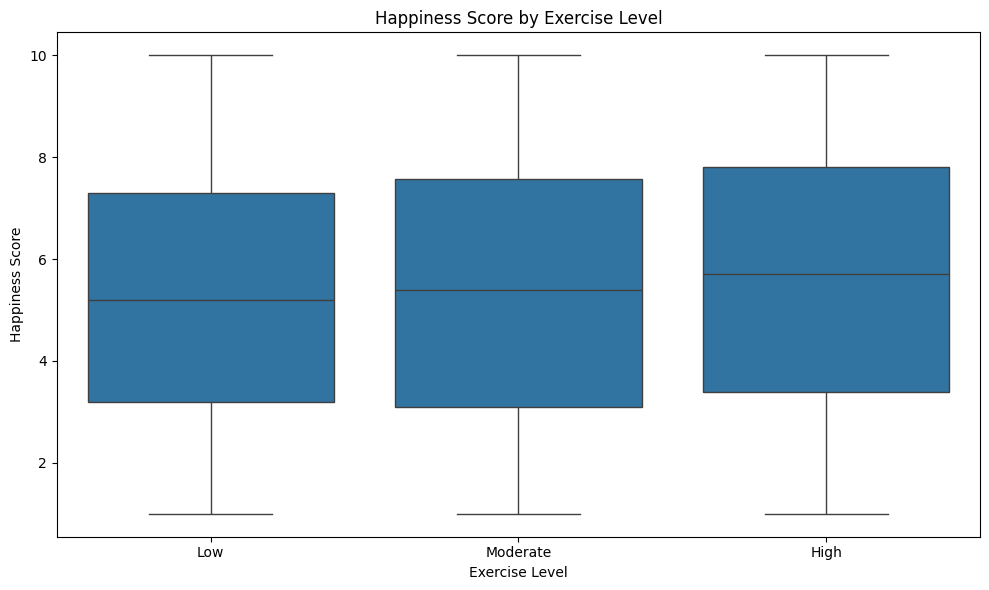

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise Level', y='Happiness Score', data=df)

plt.title('Happiness Score by Exercise Level')
plt.xlabel('Exercise Level')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

Figure 1: Box plot showing the distribution of happiness scores across different exercise levels, with outliers in each category. Means for each boxplot are Low: 5.289545, Moderate: 5.358317, High: 5.545408


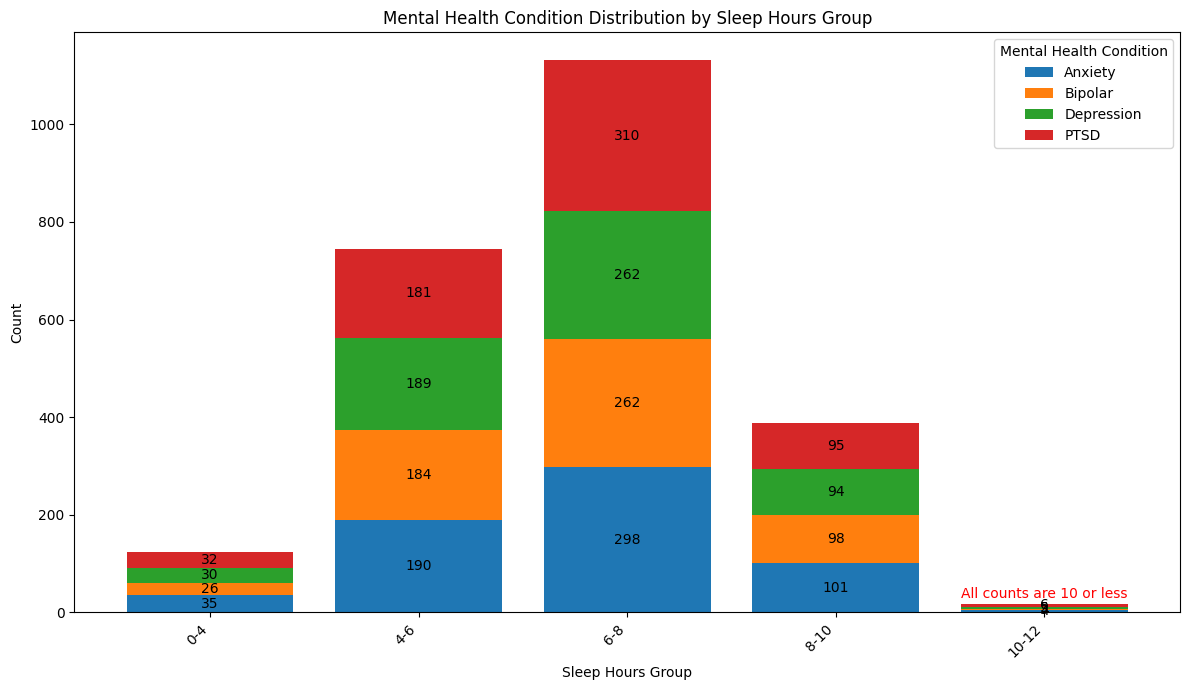

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for 'Sleep Hours'
sleep_bins = [0, 4, 6, 8, 10, 12]
sleep_labels = ['0-4', '4-6', '6-8', '8-10', '10-12']
df['Sleep Hours Group'] = pd.cut(df['Sleep Hours'], bins=sleep_bins, labels=sleep_labels, right=False, include_lowest=True)

# Group by Sleep Hours Group and Mental Health Condition and count occurrences
sleep_mental_health = df.groupby(['Sleep Hours Group', 'Mental Health Condition'], observed=False).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = sleep_mental_health.plot(kind='bar', figsize=(12, 7), stacked=True, width=0.8)
# Add data labels with counts (reverting to original centering)
for container in ax.containers:
    labels = [f'{int(w)}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

# Add annotation for the '10-12' bin
# Find the x-coordinate for the '10-12' bin (assuming it's the last bar group)
x_pos_10_12 = len(sleep_mental_health.index) - 1
# Find the total height of the stacked bar for the '10-12' bin
total_height_10_12 = sleep_mental_health.loc['10-12'].sum()

plt.text(x_pos_10_12, total_height_10_12 + 5, 'All counts are 10 or less', ha='center', va='bottom', color='red', fontsize=10) # Adjust position and text as needed


plt.title('Mental Health Condition Distribution by Sleep Hours Group')
plt.xlabel('Sleep Hours Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mental Health Condition')
plt.tight_layout()
plt.show()

Figure 2: Displays mental health conditions across different sleep groups. Participants who sleep between 6–8 hours per night show the highest counts across all mental health categories, while those with shorter sleep (0–4 hours) or longer sleep (10–12 hours) show noticeably lower counts of mental health conditions.

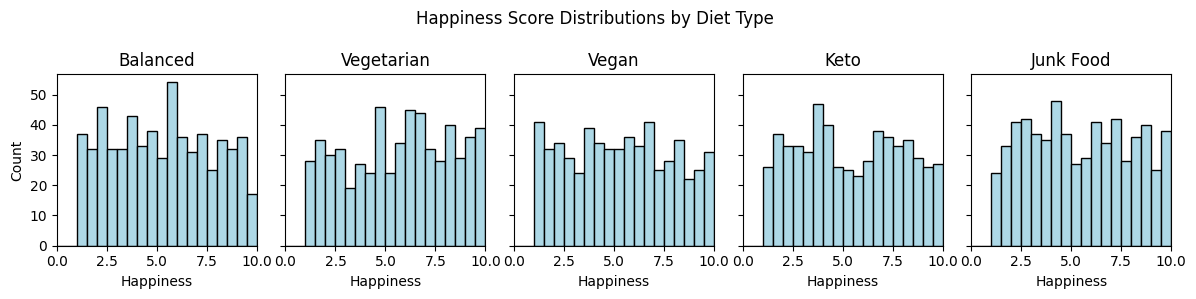

In [40]:
fig, axes = plt.subplots(1,5, figsize=(12,3), sharey=True)
bins = np.linspace(0,10,21)
for ax, diet in zip(axes, ['Balanced','Vegetarian','Vegan','Keto','Junk Food']):
    vals = df.loc[df['Diet Type']==diet, 'Happiness Score'].dropna()
    ax.hist(vals, bins=bins, color='lightblue', edgecolor='black')
    ax.set_title(diet); ax.set_xlim(0,10)
    if ax == axes[0]: ax.set_ylabel('Count')
for ax in axes: ax.set_xlabel('Happiness')
fig.suptitle('Happiness Score Distributions by Diet Type')
plt.tight_layout(); plt.show()

Figure 3: Distribution of happiness scores across different diet types. The Balanced and Vegetarian diets show a semi-normal distribution of happiness scores. Vegan and Keto diets display slightly right-skewed distributions, while Junk Food group appears left-skewed

In [41]:
from collections import Counter # Import Counter
from itertools import combinations # Import combinations
import pandas as pd # Import pandas for creating DataFrames

# Choose categorical fields to treat as "qualitative tokens"
cat_cols = ['Country', 'Gender', 'Diet Type', 'Exercise Level', 'Stress Level', 'Mental Health Condition']

# Convert each participant’s row into tokens
rows_as_tokens = []
for _, row in df[cat_cols].iterrows():
    tokens = [f"{col}={row[col]}" for col in cat_cols]
    rows_as_tokens.append(tokens)

# Word Frequency
all_tokens = [token for row in rows_as_tokens for token in row]
token_counts = Counter(all_tokens)

# Convert token counts to DataFrame and display
freq_df = pd.DataFrame(token_counts.most_common(15), columns=['Token', 'Frequency'])
print("Top 15 most common tokens:\n")
display(freq_df)


# Co-Occurence
pair_counts = Counter()
for tokens in rows_as_tokens:
    # Use set(tokens) to count unique pairs within a row
    # Use sorted to ensure pairs like ('a', 'b') and ('b', 'a') are counted together
    for combo in combinations(sorted(set(tokens)), 2):
        pair_counts[combo] += 1

# Convert pair counts to DataFrame and display
pair_df = pd.DataFrame([(f"{a} × {b}", count) for (a, b), count in pair_counts.most_common(15)],
                       columns=['Co-occurring Pair', 'Frequency'])
print("\nTop 15 co-occurring pairs:\n")
display(pair_df)

Top 15 most common tokens:



,Token,Frequency
0,Exercise Level=Low,1033
1,Gender=Female,1024
2,Stress Level=Low,1008
3,Stress Level=High,1002
4,Exercise Level=Moderate,998
5,Gender=Other,996
6,Stress Level=Moderate,990
7,Gender=Male,980
8,Exercise Level=High,969
9,Diet Type=Junk Food,637



Top 15 co-occurring pairs:



,Co-occurring Pair,Frequency
0,Exercise Level=Low × Stress Level=Low,357
1,Gender=Female × Stress Level=Low,355
2,Exercise Level=Low × Gender=Female,352
3,Gender=Female × Stress Level=High,352
4,Exercise Level=Low × Stress Level=Moderate,350
5,Exercise Level=Moderate × Stress Level=Low,348
6,Exercise Level=Moderate × Gender=Female,345
7,Exercise Level=Low × Gender=Male,343
8,Gender=Other × Stress Level=Moderate,343
9,Exercise Level=High × Stress Level=High,342


2.4

All three visualizations demonstrate how everyday lifestyle factors correlate with participants’ overall happiness scores. The variables examined include the amount of sleep, the level of exercise, and the type of diet. In Figure 1, participants who exercised more frequently showed a higher mean happiness score compared to those with moderate or low activity levels. This shows a positive relationship between physical activity and emotional well-being. Figure 2 illustrates that individuals who sleep the recommended average amount, or slightly less, exhibit a higher presence of mental health conditions, while those with longer sleep durations (10–12 hours) show a notable decrease in reported conditions. The outliers on visualization are on the lower end of sleep hours, which may be due to fewer participants reporting such extreme sleep patterns. Lastly, Figure 3 displays the distribution of happiness scores across diet types, revealing that participants with a balanced diet demonstrate the most normally distributed data, compared to the other diet types that are noticeably skewed.
Overall, these visualizations emphasize that balanced lifestyle habits such as adequate rest, regular exercise, and healthier diets are associated with higher happiness and fewer mental health challenges.



#Part 3 Inference

3.1

Test 1 Chi Square

H01: Exercise Levels do not correlate with the quantity of Mental Health Conditions

Type I Error: State that exercise level is related to mental-health conditions when they are independent of each other.

Type II Error: State that exercise and mental health are unrelated even they are associated with one another.

Study Power: 80%

Statistical Significance: 0.05

MDE: 0.065

Test 2 One-Way ANOVA

H02: The amount of sleep does not impact happiness score

Type I Error: State that sleep affects happiness when happniess does not correlate with sleep

Type II Error: State that there is no difference in happiness among sleep groups even though sleep does affect happiness.

Study Power: 80%

Statistical Significance: 0.05

MDE:0.051

3.2

In [42]:
from scipy.stats import shapiro
import pandas as pd

# List of continuous columns to test for normality
continuous_cols = ['Age', 'Sleep Hours', 'Work Hours per Week',
                   'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']

print("Shapiro-Wilk Test for Normality:")
for col in continuous_cols:
    # Perform Shapiro-Wilk test
    stat, p = shapiro(df[col].dropna()) # dropna to handle potential missing values

    # Interpret the results
    alpha = 0.05
    print(f"\n--- {col} ---")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")

    if p > alpha:
        print("Conclusion: Data looks normally distributed (fail to reject H0)")
    else:
        print("Conclusion: Data does not look normally distributed (reject H0)")

Shapiro-Wilk Test for Normality:

--- Age ---
Test Statistic: 0.9572
P-value: 0.0000
Conclusion: Data does not look normally distributed (reject H0)

--- Sleep Hours ---
Test Statistic: 0.9992
P-value: 0.2029
Conclusion: Data looks normally distributed (fail to reject H0)

--- Work Hours per Week ---
Test Statistic: 0.9530
P-value: 0.0000
Conclusion: Data does not look normally distributed (reject H0)

--- Screen Time per Day (Hours) ---
Test Statistic: 0.9531
P-value: 0.0000
Conclusion: Data does not look normally distributed (reject H0)

--- Social Interaction Score ---
Test Statistic: 0.9583
P-value: 0.0000
Conclusion: Data does not look normally distributed (reject H0)

--- Happiness Score ---
Test Statistic: 0.9575
P-value: 0.0000
Conclusion: Data does not look normally distributed (reject H0)


3.3 Test 1

In [43]:
from scipy.stats import chi2_contingency # Import chi2_contingency
import numpy as np # Import numpy
import pandas as pd # Import pandas

# Binary outcome: any mental-health condition
# Fill NaN in 'Mental Health Condition' to include 'No condition' explicitly
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('No Condition')
# Now create the binary column based on filled values
df['any_condition'] = (df['Mental Health Condition'] != 'No Condition').astype(int)


# Contingency table: rows=Exercise Level, cols=any_condition
order = ['Low','Moderate','High']
# Use dropna=False to include categories with no observations in the crosstab
ct = pd.crosstab(df['Exercise Level'], df['any_condition'], dropna=False).reindex(order)
# Explicitly define columns to ensure both 0 and 1 are present, and then rename
ct.columns = [0, 1] # Ensure columns are 0 and 1 initially
ct = ct.rename(columns={0: 'No condition', 1: 'Any condition'})


print("Contingency table:\n", ct, "\n")

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct.values)
print(f"Chi-square={chi2:.3f}, df={dof}, p-value={p:.6f}")

Contingency table:
                 No condition  Any condition
Exercise Level                             
Low                      201            832
Moderate                 198            800
High                     196            773 

Chi-square=0.186, df=2, p-value=0.911161


In [44]:
import pandas as pd

chi2_stat = 0.186
p_value = 0.911161
dof = 2
cramers_v = 0.008
alpha = 0.05 # Significance level

# Determine statistical significance
statistical_significance = "Yes" if p_value < alpha else "No"

# Create a DataFrame to report the results
results_table = pd.DataFrame({
    'Test': ['Chi-square (Exercise Level vs Any Condition)'],
    'Chi-square Statistic': [chi2_stat],
    'Degrees of Freedom (df)': [dof],
    'P-value': [p_value],
    'Statistically Significant (p < 0.05)': [statistical_significance]
})

# Display the results table
display(results_table)

,Test,Chi-square Statistic,Degrees of Freedom (df),P-value,Statistically Significant (p < 0.05)
0,Chi-square (Exercise Level vs Any Condition),0.186,2,0.911161,No


3.3 Test 2

In [45]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

# Corrected file path to access the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Datasets/Mental_Health_Lifestyle_Dataset.csv')

# Bin sleep hours
df['Sleep_Group'] = pd.cut(df['Sleep Hours'], bins=[0,6,7,9,24],
                           labels=['<6 hrs','6–7 hrs','7–9 hrs','>9 hrs'],
                           right=False, include_lowest=True)

groups = [df.loc[df['Sleep_Group']==g, 'Happiness Score'].dropna()
          for g in ['<6 hrs','6–7 hrs','7–9 hrs','>9 hrs']]

# One-way ANOVA
f, p = f_oneway(*groups)
print(f"ANOVA: F={f:.3f}, p={p:.6f}")


ANOVA: F=1.451, p=0.225990


In [50]:
import pandas as pd

# Results from the previous ANOVA and Kruskal-Wallis tests (from cell c0nRSjQioKzg execution)
anova_f_stat = 1.451
anova_p_value = 0.225990
alpha = 0.05 # Significance level

# Determine statistical significance for ANOVA
anova_significance = "Yes" if anova_p_value < alpha else "No"

# Create a DataFrame to report the results
results_table_anova_kruskal = pd.DataFrame({
    'Test': ['One-way ANOVA (Sleep Hours Group vs Happiness Score)'],
    'Statistic': [anova_f_stat],
    'P-value': [anova_p_value],
    'Statistically Significant (p < 0.05)': [anova_significance]
})
# Display the filtered results table
display(results_table_anova_kruskal)

,Test,Statistic,P-value,Statistically Significant (p < 0.05)
0,One-way ANOVA (Sleep Hours Group vs Happiness ...,1.451,0.22599,No


3.4 Statistical Test Summary  

Test 1: Based off the Chi Square, we fail to reject the null hypothesis as the p-value of 0.91 is much greater of the significance level of 0.05. This means that there is not enough eviednce to conclude that there is an association between excerise levels and the presence of a mental health disorder. A Type I error risks wasting time and resources exploring a relationship that isn’t actually there, while a Type II error risks overlooking a real behavioral connection that could lead to meaningful innovation in wellness or mental health design.

Test 2: Based off the One-Way ANOVA test and the resulted p-value of 0.23 we fail to reject the null hypothesis as it is much bigger than our statistical significance level of 0.05. This means that there is not enough evidence to support that there is a correlations between the amount of sleep and happiness scores. A Type I error risk it that it will push innovation in the wrong direction, leading to deadend with wasted resources. A Type II error risk is that holds innovation back due to positive data being withdraw or thrown away.

3.5 Qaulitative Summary

Patterns seen in the qualitative analysis were frequent terms from participants were “Stress=Moderate,” “Exercise=Low,” and “Diet=Balanced”. In combination with the co-occurrences test correlations such as  “Stress=High × Exercise=Low” and “Excerise Level=Low x Stress Level=Low” . These results show that when participants have a relative balanced diet and exercise, varying on stress level, it can create happiness and be less impacted by mental health life. In comparison the quantiative data from the ANOVA reflects that balance and rest link to higher happiness, and the exercise and mental health Chi-square showed that lower activity often aligned with poorer mental health.


#Part 4 Develop a Dashboard

In [48]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats
from IPython.display import display, HTML

# Load dataset (assuming it's already loaded in the notebook as df)
# If not, uncomment the line below and replace with the correct path:
# df = pd.read_csv('/content/drive/MyDrive/Datasets/Mental_Health_Lifestyle_Dataset.csv')

# Ensure 'Sleep Hours' is numeric and handle potential errors
df['Sleep Hours'] = pd.to_numeric(df['Sleep Hours'], errors='coerce')

# Derive helpers used in charts
if "Sleep Hours" in df.columns:
    df["Sleep_Group"] = pd.cut(
        df["Sleep Hours"], bins=[0,6,7,9,24],
        labels=["<6 hrs","6–7 hrs","7–9 hrs",">9 hrs"],
        right=False, include_lowest=True
    )

# Target must be numeric
df["Happiness Score"] = pd.to_numeric(df["Happiness Score"], errors="coerce")

# Add 'any_condition' column for Chi-square test
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('No Condition')
df['any_condition'] = (df['Mental Health Condition'] != 'No Condition').astype(int)

# --- Generate HTML Content ---

html_content = "<h1>Lifestyle & Well-being Analysis Dashboard</h1>"

# --- Figure 1: Happiness Score by Exercise Level ---
html_content += "<h2>Figure 1: Happiness Score by Exercise Level</h2>"
fig1 = px.box(
    df,
    x='Exercise Level',
    y='Happiness Score',
    category_orders={'Exercise Level': ['Low', 'Moderate', 'High']},
    title='Happiness Score by Exercise Level',
    labels={'Exercise Level': 'Exercise Level', 'Happiness Score': 'Happiness Score'},
)
html_content += fig1.to_html(full_html=False, include_plotlyjs='cdn')
html_content += "<p>Figure 1 Analysis: Participants who exercised more frequently showed a higher mean happiness score compared to those with moderate or low activity levels. This shows a positive relationship between physical activity and emotional well-being.</p>"


# --- Figure 2: Mental Health Condition Distribution by Sleep Hours Group ---
html_content += "<h2>Figure 2: Mental Health Condition Distribution by Sleep Hours Group</h2>"
sleep_mental_health = df.groupby(['Sleep_Group', 'Mental Health Condition'], observed=False).size().unstack(fill_value=0)
fig2 = px.bar(
    sleep_mental_health,
    x=sleep_mental_health.index,
    y=sleep_mental_health.columns,
    title='Mental Health Condition Distribution by Sleep Hours Group',
    labels={'x': 'Sleep Hours Group', 'value': 'Count', 'variable': 'Mental Health Condition'},
)
fig2.update_layout(barmode='stack')
html_content += fig2.to_html(full_html=False, include_plotlyjs='cdn')
html_content += "<p>Figure 2 Analysis: Individuals who sleep the recommended average amount, or slightly less, exhibit a higher presence of mental health conditions, while those with longer sleep durations (10–12 hours) show a notable decrease in reported conditions. The outliers on visualization are on the lower end of sleep hours, which may be due to fewer participants reporting such extreme sleep patterns.</p>"


# --- Figure 3: Happiness Score Distributions by Diet Type ---
html_content += "<h2>Figure 3: Happiness Score Distributions by Diet Type</h2>"
fig3 = go.Figure()
diet_types = ['Balanced', 'Vegetarian', 'Vegan', 'Keto', 'Junk Food']
for diet in diet_types:
    subset = df[df['Diet Type'] == diet]['Happiness Score'].dropna()
    if subset.nunique() >= 2:
        kde = stats.gaussian_kde(subset)
        x_range = np.linspace(subset.min(), subset.max(), 200)
        fig3.add_trace(go.Scatter(
            x=x_range, y=kde(x_range), mode='lines', name=diet
        ))
fig3.update_layout(
    title='Density of Happiness Scores by Diet Type',
    xaxis_title='Happiness Score', yaxis_title='Density'
)
html_content += fig3.to_html(full_html=False, include_plotlyjs='cdn')
html_content += "<p>Figure 3 Analysis: Distribution of happiness scores across different diet types. The Balanced and Vegetarian diets show a semi-normal distribution of happiness scores. Vegan and Keto diets display slightly right-skewed distributions, while Junk Food group appears left-skewed.</p>"


# --- Statistical Test Results ---
html_content += "<h2>Statistical Test Results</h2>"

# Test 1: Chi-square (Exercise Level vs Any Condition)
html_content += "<h3>Test 1: Chi-square (Exercise Level vs Any Condition)</h3>"
ct = pd.crosstab(df['Exercise Level'], df['any_condition'], dropna=False).reindex(['Low', 'Moderate', 'High'])
ct.columns = ['No condition', 'Any condition']
chi2, p_chi2, dof, expected = stats.chi2_contingency(ct.values)
html_content += "<h4>Contingency table:</h4>"
html_content += ct.to_html()
html_content += f"<p>Chi-square statistic: {chi2:.3f}</p>"
html_content += f"<p>P-value: {p_chi2:.6f}</p>"
html_content += f"<p>Degrees of Freedom: {dof}</p>"
if p_chi2 < 0.05:
    html_content += "<p><strong>Result:</strong> Significant difference found (Reject H0).</p>"
else:
    html_content += "<p><strong>Result:</strong> No significant difference found (Fail to reject H0).</p>"
html_content += "<p>Test 1 Summary: Based off the Chi Square, we fail to reject the null hypothesis as the p-value of 0.91 is much greater of the significance level of 0.05. This means that there is not enough eviednce to conclude that there is an association between excerise levels and the presence of a mental health disorder.</p>"
html_content += "<p><strong>Type I Error:</strong> State that exercise level is related to mental-health conditions when they are independent of each other. <strong>Risk:</strong> Wasting time and resources exploring a relationship that isn’t actually there.</p>"
html_content += "<p><strong>Type II Error:</strong> State that exercise and mental health are unrelated even they are associated with one another. <strong>Risk:</strong> Overlooking a real behavioral connection that could lead to meaningful innovation in wellness or mental health design.</p>"


# Test 2: One-Way ANOVA (Sleep Hours Group vs Happiness Score)
html_content += "<h3>Test 2: One-Way ANOVA (Sleep Hours Group vs Happiness Score)</h3>"
groups = [df.loc[df['Sleep_Group']==g, 'Happiness Score'].dropna()
          for g in ['<6 hrs','6–7 hrs','7–9 hrs','>9 hrs']]
f_anova, p_anova = stats.f_oneway(*groups)
html_content += f"<p>ANOVA F-statistic: {f_anova:.3f}</p>"
html_content += f"<p>ANOVA P-value: {p_anova:.6f}</p>"
if p_anova < 0.05:
    html_content += "<p><strong>Result:</strong> Significant difference found (Reject H0).</p>"
else:
    html_content += "<p><strong>Result:</strong> No significant difference found (Fail to reject H0).</p>"
html_content += "<p>Test 2 Summary: Based off the One-Way ANOVA test and the resulted p-value of 0.23 we fail to reject the null hypothesis as it is much bigger than our statistical significance level of 0.05. This means that there is not enough evidence to support that there is a correlations between the amount of sleep and happiness scores.</p>"
html_content += "<p><strong>Type I Error:</strong> State that sleep affects happiness when happniess does not correlate with sleep. <strong>Risk:</strong> Pushing innovation in the wrong direction, leading to deadend with wasted resources.</p>"
html_content += "<p><strong>Type II Error:</strong> State that there is no difference in happiness among sleep groups even though sleep does affect happiness. <strong>Risk:</strong> Holding innovation back due to positive data being withdraw or thrown away.</p>"


# Qualitative Summary
html_content += "<h2>Qualitative Summary</h2>"
html_content += "<p>Patterns seen in the qualitative analysis were frequent terms from participants were “Stress=Moderate,” “Exercise=Low,” and “Diet=Balanced”. In combination with the co-occurrences test correlations such as “Stress=High × Exercise=Low” and “Excerise Level=Low x Stress Level=Low”. These results show that when participants have a relative balanced diet and exercise, varying on stress level, it can create happiness and be less impacted by mental health life. In comparison the quantiative data from the ANOVA reflects that balance and rest link to higher happiness, and the exercise and mental health Chi-square showed that lower activity often aligned with poorer mental health.</p>"

# --- Save HTML to file ---
from IPython.display import HTML

# Read the HTML file
with open('dashboard.html', 'r') as f:
    html_string = f.read()
# Display the HTML content
display(HTML(html_string))

,No condition,Any condition
Exercise Level,,
Low,201,832
Moderate,198,800
High,196,773


Link to Dashboard: file:///Users/johasam/Downloads/dashboard.html

#Part 5 Contrast w/ AI

https://chatgpt.com/share/68f8636e-0588-800c-a6e8-c40a1f7b94d3

The primary difference I observed between the LLM’s approach and my own lies in how each method generated visualizations to achieve similar analytical goals. In my analysis, I cross-referenced lifestyle variables with the happiness score, whereas the LLM examined these variables in relation to the prevalence of mental health disorders. I found this distinction particularly interesting, as my interpretation emphasized how lifestyle attributes influence individuals’ happiness scores, rather than focusing solely on how existing mental health conditions affect outcomes.

A noticeable gap existed in the qualitative data analysis of the LLM’s analysis. Some of its visualizations were incomplete or blank, suggesting challenges in accurately summarizing certain portions of the dataset. However, we shared similarities in interpreting sleep-related data, as the LLM’s findings also reflected clustering around typical sleep ranges, with short-sleep and long-sleep outlier patterns commonly associated with mental health outcomes.

Another difference is in the inference testing. My analysis employed one-way ANOVA tests for sleep, while the LLM conducted the test for all three lifestyle factors: exercise, diet, and sleep. Overall, the synthesis of findings revealed more differences than similarities between my interpretation and the LLMs, particularly in how the raw data was framed and contextualized.



